In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import color
%matplotlib inline
K.clear_session()

In [2]:
from keras.applications.inception_v3 import InceptionV3
model = InceptionV3(weights='imagenet')
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [3]:
def cam(img_path,index):
    from keras.applications.inception_v3 import InceptionV3
    import matplotlib.image as mpimg
    #from keras import backend as K
    #import matplotlib.pyplot as plt

    %matplotlib inline
    K.clear_session()
    
    model = InceptionV3(weights='imagenet')
    img=mpimg.imread(img_path)
    plt.imshow(img)
    from keras.preprocessing import image
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    #import numpy as np
    x = np.expand_dims(x, axis=0)
    from keras.applications.inception_v3 import preprocess_input, decode_predictions
    x = preprocess_input(x)
    preds = model.predict(x)
    import pandas as pd
    predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
    argmax = np.argmax(preds[0])
    output = model.output[:, argmax]
    last_conv_layer = model.get_layer('mixed10')
    grads = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    #import cv2
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmapN = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    hif = .8
    superimposed_img = heatmapN * hif + img
    if index==67:
      output = 'drive/My Drive/Tesi/Colab Notebooks/output67.jpeg'
    if index==3:
      output = 'drive/My Drive/Tesi/Colab Notebooks/output3.jpeg'
    if index==4:
      output = 'drive/My Drive/Tesi/Colab Notebooks/output4.jpeg'
    if index==6:
      output = 'drive/My Drive/Tesi/Colab Notebooks/output6.jpeg'
    if index==8:
      output = 'drive/My Drive/Tesi/Colab Notebooks/output8.jpeg'
    cv2.imwrite(output, superimposed_img)
    img=mpimg.imread(output)
    plt.imshow(img)
    plt.axis('off')
    plt.title(predictions.loc[0,'category'].upper())
    return heatmap,img

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
40960/35363 [==================================] - 0s 0us/step


(-0.5, 458.5, 499.5, -0.5)

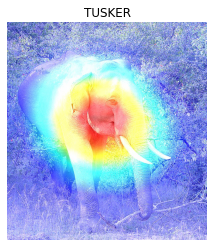

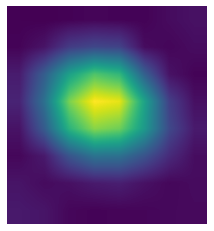

In [4]:
heatmap67,img67 = cam('drive/My Drive/Tesi/Colab Notebooks/ILSVRC2012_val_00000067.JPEG',67)
plt.figure()
plt.imshow(heatmap67)
plt.axis('off')

(-0.5, 458.5, 499.5, -0.5)

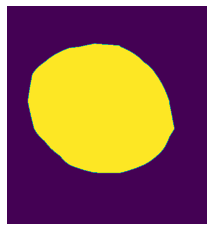

In [5]:
max67=heatmap67.max()
threshold=0.2*max67
ret67,img67_thresh= cv2.threshold(heatmap67,threshold,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img67_thresh)
plt.axis('off')

(-0.5, 458.5, 499.5, -0.5)

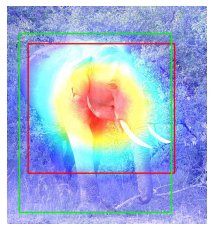

In [6]:
 contours67,hierarchy67 = cv2.findContours(img67_thresh, 1, 2)
 cnt67 = contours67[0]
 x67,y67,w67,h67 = cv2.boundingRect(np.float32(cnt67))
 #print(x67,y67,w67,h67)
 plt.figure()
 plt.imshow(cv2.rectangle(img67,(x67,y67),(x67+w67,y67+h67),(255,0,0),2))
 plt.imshow(cv2.rectangle(img67,(28,473),(377,63),(0,255,0),2))
 plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

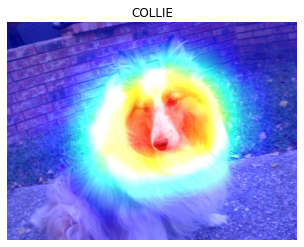

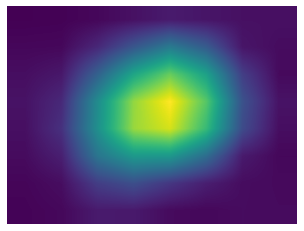

In [7]:
heatmap3,img3 = cam('drive/My Drive/Tesi/Colab Notebooks/ILSVRC2012_val_00000003.JPEG',3)
plt.figure()
plt.imshow(heatmap3)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

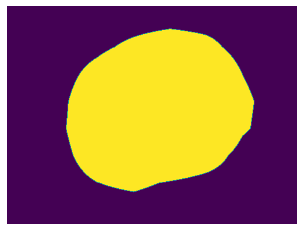

In [8]:
max3=heatmap3.max()
threshold=0.2*max3
ret3,img3_thresh= cv2.threshold(heatmap3,threshold,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img3_thresh)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

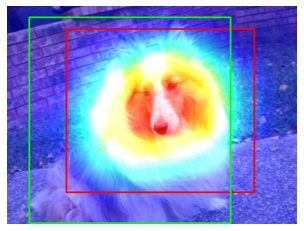

In [9]:
 contours3,hierarchy3 = cv2.findContours(img3_thresh, 1, 2)
 cnt3 = contours3[0]
 x3,y3,w3,h3 = cv2.boundingRect(np.float32(cnt3))
 #print(x3,y3,w3,h3)
 plt.figure()
 plt.imshow(cv2.rectangle(img3,(x3,y3),(x3+w3,y3+h3),(255,0,0),2))
 plt.imshow(cv2.rectangle(img3,(38,373),(385,19),(0,255,0),2))
 plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

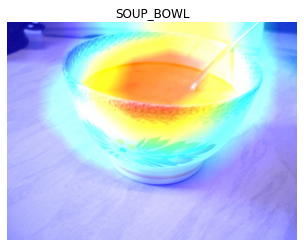

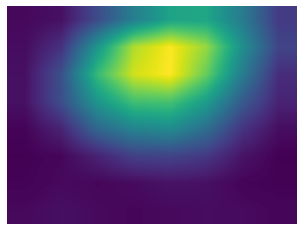

In [10]:
heatmap4,img4 = cam('drive/My Drive/Tesi/Colab Notebooks/ILSVRC2012_val_00000004.JPEG',4)
plt.figure()
plt.imshow(heatmap4)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

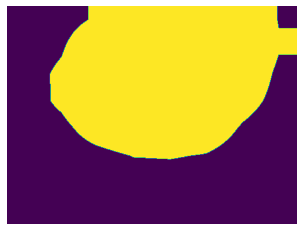

In [11]:
max4=heatmap4.max()
threshold=0.2*max4
ret4,img4_thresh= cv2.threshold(heatmap4,threshold,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img4_thresh)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

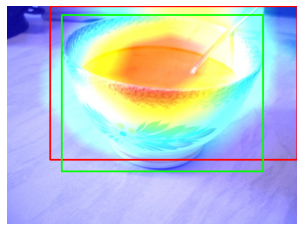

In [12]:
 contours4,hierarchy4 = cv2.findContours(img4_thresh, 1, 2)
 cnt4 = contours4[0]
 x4,y4,w4,h4 = cv2.boundingRect(np.float32(cnt4))
 #print(x4,y4,w4,h4)
 plt.figure()
 plt.imshow(cv2.rectangle(img4,(x4,y4),(x4+w4,y4+h4),(255,0,0),2))
 plt.imshow(cv2.rectangle(img4,(94,284),(441,15),(0,255,0),2))
 plt.axis('off')

(-0.5, 499.5, 367.5, -0.5)

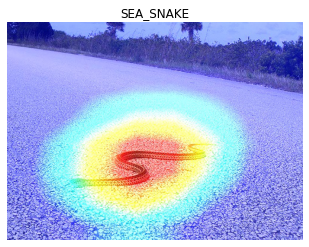

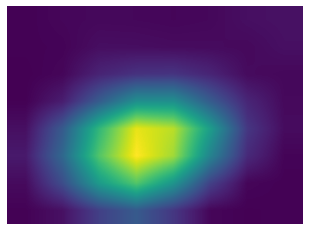

In [13]:
heatmap6,img6 = cam('drive/My Drive/Tesi/Colab Notebooks/ILSVRC2012_val_00000006.JPEG',6)
plt.figure()
plt.imshow(heatmap6)
plt.axis('off')

(-0.5, 499.5, 367.5, -0.5)

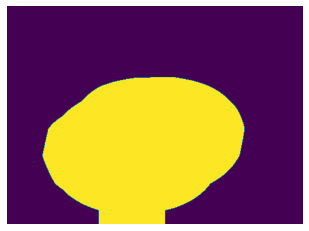

In [14]:
max6=heatmap6.max()
threshold=0.2*max6
ret6,img6_thresh= cv2.threshold(heatmap6,threshold,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img6_thresh)
plt.axis('off')

(-0.5, 499.5, 367.5, -0.5)

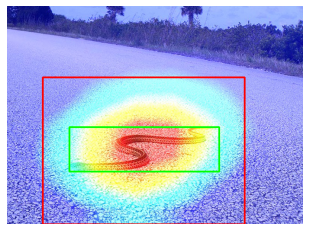

In [15]:
 contours6,hierarchy6 = cv2.findContours(img6_thresh, 1, 2)
 cnt6 = contours6[0]
 x6,y6,w6,h6 = cv2.boundingRect(np.float32(cnt6))
 #print(x6,y6,w6,h6)
 plt.figure()
 plt.imshow(cv2.rectangle(img6,(x6,y6),(x6+w6,y6+h6),(255,0,0),2))
 plt.imshow(cv2.rectangle(img6,(105,279),(358,204),(0,255,0),2))
 plt.axis('off')


(-0.5, 499.5, 374.5, -0.5)

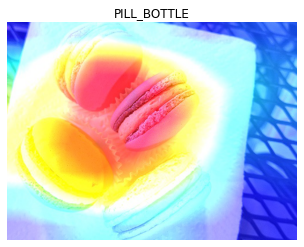

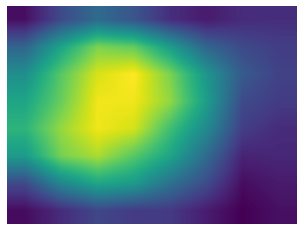

In [16]:
heatmap8,img8 = cam('drive/My Drive/Tesi/Colab Notebooks/ILSVRC2012_val_00000008.JPEG',8)
plt.figure()
plt.imshow(heatmap8)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

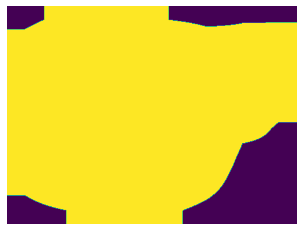

In [17]:
max8=heatmap8.max()
threshold=0.2*max8
ret8,img8_thresh= cv2.threshold(heatmap8,threshold,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(img8_thresh)
plt.axis('off')

(-0.5, 499.5, 374.5, -0.5)

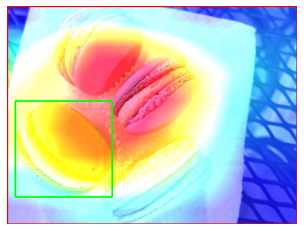

In [18]:
 contours8,hierarchy8 = cv2.findContours(img8_thresh, 1, 2)
 cnt8 = contours8[0]
 x8,y8,w8,h8 = cv2.boundingRect(np.float32(cnt8))
 #print(x8,y8,w8,h8)
 plt.figure()
 plt.imshow(cv2.rectangle(img8,(x8,y8),(x8+w8,y8+h8),(255,0,0),2))
 plt.imshow(cv2.rectangle(img8,(14,328),(181,163),(0,255,0),2))
 plt.axis('off')